Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64
350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
----------------------------------------
98481.1
----------------------------------------


C:\Users\KH302\AppData\Local\Temp\ipykernel_10456\2982462003.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = format(y[idx], ',') + '건'
C:\Users\KH302\AppData\Local\Temp\ipykernel_10456\2982462003.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratioval = '%.1f%%' % (ratio[idx])
C:\Users\KH302\AppData\Local\Temp\ipykernel_10456\2982462003.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=idx, y=y[idx] 

barChartPractice_01.png파일이 저장되었습니다.


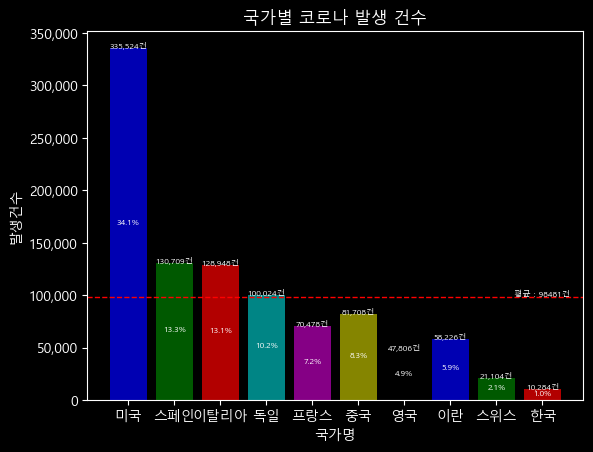

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = "barChartPractice"
filename = './../data/주요발생국가주간동향(4월2째주).csv'

data = pd.read_csv(filename, index_col='국가')
print(data.columns)

chartdata = data['4월06일']
print(chartdata)

#plt.bar() 메소드 정의
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.grid(True)

    YTICKS_INTERVAL = 50000
    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    print('-' * 40)

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'
        ratioval = '%.1f%%' % (ratio[idx])
        #그래프의 위에 건수 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    #평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)
    print('-' * 40)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size-1, y=meanval + 200, s=average, horizontalalignment='center')

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + '.png'
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', ylabel='발생건수', title='국가별 코로나 발생 건수')

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
     4월06일  4월07일  4월08일
국가                      
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
chartdata
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
maxlim :  90000
barChartPractice_07.png파일이 저장되었습니다.
국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589
chartdata
국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589
maxlim :  90000
barChartPractice_08.png파일이 저장되었습니다.
chartdata
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60

<Figure size 640x480 with 0 Axes>

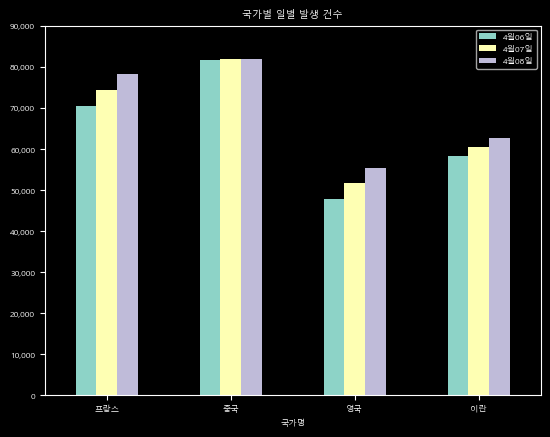

<Figure size 640x480 with 0 Axes>

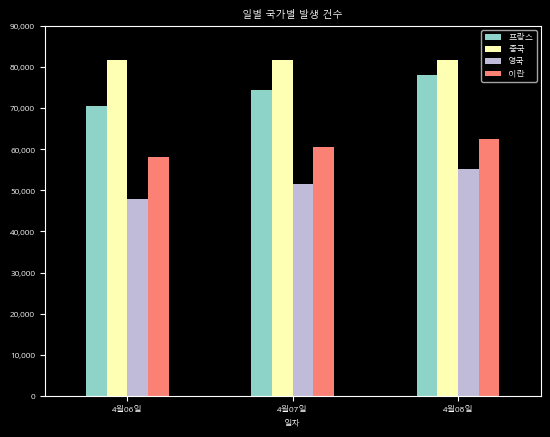

<Figure size 640x480 with 0 Axes>

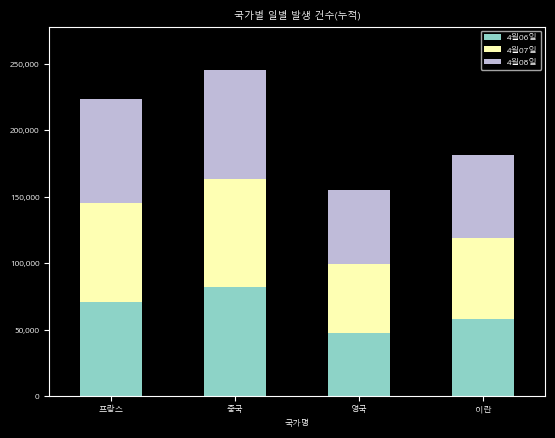

In [18]:
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked=False, yticks_interval=10000):
    plt.figure()
    # 범례에 제목을 넣기 위해 plot()의 legend옵션 사용
    chartdata.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked)

    plt.legend(loc='best')
    print('chartdata')
    print(chartdata)

    if stacked == False :
        maxlim = (int(max(chartdata.max())/ yticks_interval) + 1) * yticks_interval
        print('maxlim : ', maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])
    else: # 누적 막대 그래프
        maxlim = (int(max(chartdata.sum(axis=1))/ yticks_interval) + 1) * yticks_interval
        print('maxlim : ', maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # y축의 상하한 값이 주어 지는 경우에만 설정한다.
    if ylim != None:
        plt.ylim(ylim)
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + "파일이 저장되었습니다.")

data = pd.read_csv(filename, index_col='국가')
print(data.columns)

COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]
print(data)
data.index.name='국가명'
data.columns.name='일자'

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수')

# 일자별 각 구가별 데이터를 보여주기 위해 전치
dataT = data.T
print(dataT)

MakeBarChart02(chartdata=dataT, rotation=0, title='일별 국가별 발생 건수')

# 누적 막대 그래프 stacked매개변수를 True로 지정하면 누적된 형태로 그릴 수 있다.
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata=data, rotation = 0, title='국가별 일별 발생 건수(누적)', ylim=[0,ymaxlimit], stacked=True, yticks_interval=50000)

['프랑스', '중국', '영국']
     4월06일  4월07일  4월08일  4월09일  4월10일  4월11일  4월12일
국가                                                  
프랑스  70478  74390  78167  82048  86334  90276  93790
중국   81708  81740  81802  81865  81907  81953  82052
영국   47806  51608  55242  60733  65077  73758  78991
column_names
['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']
chartdata
{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]), '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]), '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}
barChartPractice_02.png파일이 저장되었습니다.


(<Figure size 920x500 with 1 Axes>, <Axes: >)

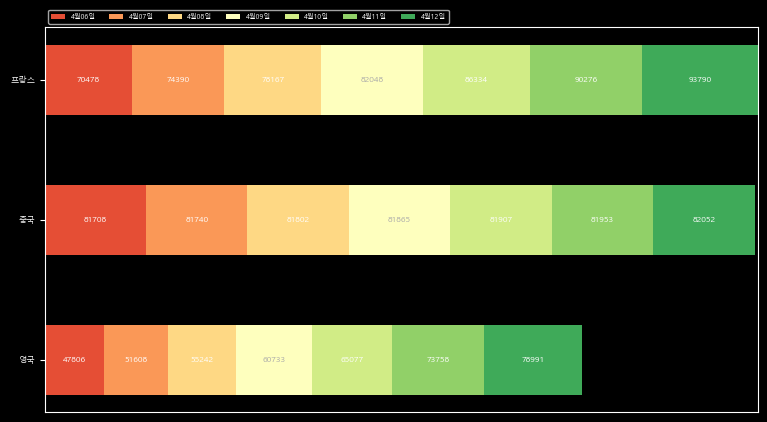

In [10]:
data=pd.read_csv(filename, index_col='국가')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
print(three)

data = data.loc[three]
print(data)

column_names = data.columns.tolist()
print('column_names')
print(column_names)

# 국가별 numpy 배열을 저장하고 있는 사전
chartdata = {}

for row in data.index:
    chartdata[row] = data.loc[row].values
print('chartdata')
print(chartdata)

# 가로 누적 막대 그래프 함수 정의
def MakeBarChart03(chartdata, column_names):
    """
    Parameters
    ----------
    chartdata : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that it matches the length of *column_names*.
    column_names : list of str
        The category labels.
    """
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b <0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')
    return fig, ax

MakeBarChart03(chartdata, column_names)
